In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as data
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
plt.style.use('bmh')

In [3]:
def fetch_stock_data(ticker, start_date):
    data = yf.download(ticker, start=start_date)
    return data
ticker = 'MSFT'
start_date = '2010-01-01'
data = fetch_stock_data(ticker, start_date)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.389397,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.396959,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.253368,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.011541,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.170244,51197400
...,...,...,...,...,...,...
2024-07-03,458.190002,461.019989,457.880005,460.769989,460.769989,9932800
2024-07-05,459.609985,468.350006,458.970001,467.559998,467.559998,16000300
2024-07-08,466.549988,467.700012,464.459991,466.239990,466.239990,12962300


In [4]:
data = data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.389397,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.396959,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.253368,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.011541,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.170244,51197400
...,...,...,...,...,...,...,...
3648,2024-07-03,458.190002,461.019989,457.880005,460.769989,460.769989,9932800
3649,2024-07-05,459.609985,468.350006,458.970001,467.559998,467.559998,16000300
3650,2024-07-08,466.549988,467.700012,464.459991,466.239990,466.239990,12962300
3651,2024-07-09,467.000000,467.329987,458.000000,459.540009,459.540009,17207200


In [5]:
data = data.drop(['Date','Adj Close'], axis=1)
data

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400
...,...,...,...,...,...
3648,458.190002,461.019989,457.880005,460.769989,9932800
3649,459.609985,468.350006,458.970001,467.559998,16000300
3650,466.549988,467.700012,464.459991,466.239990,12962300
3651,467.000000,467.329987,458.000000,459.540009,17207200


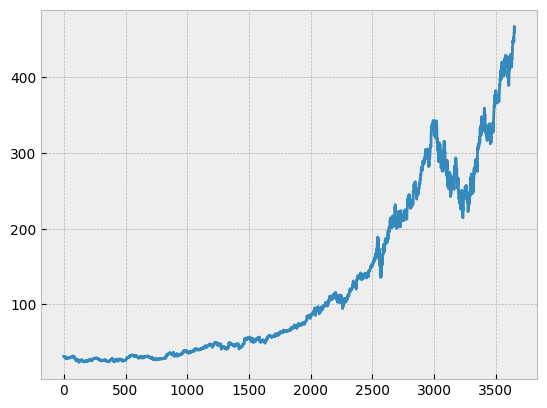

In [6]:
plt.plot(data.Close)

In [7]:
ma100 = data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3648    420.442801
3649    420.912901
3650    421.422701
3651    421.954901
3652    422.506601
Name: Close, Length: 3653, dtype: float64

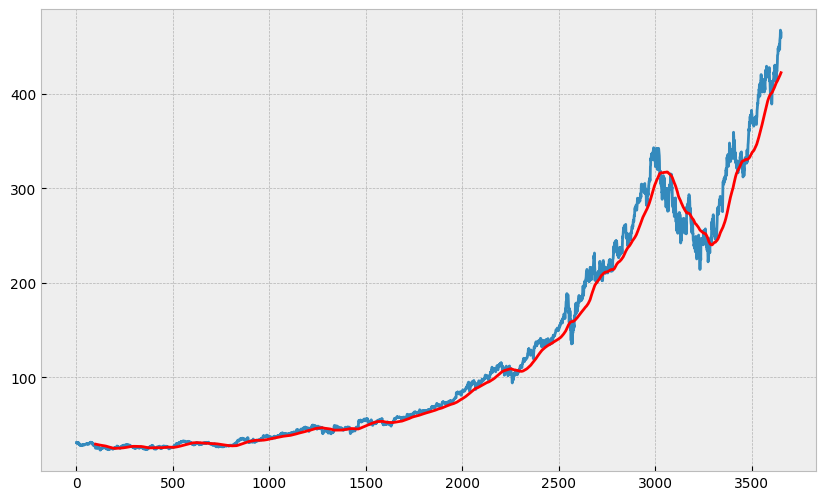

In [8]:
plt.figure(figsize=(10,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = data.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3648    391.437551
3649    392.130051
3650    392.818001
3651    393.511851
3652    394.237501
Name: Close, Length: 3653, dtype: float64

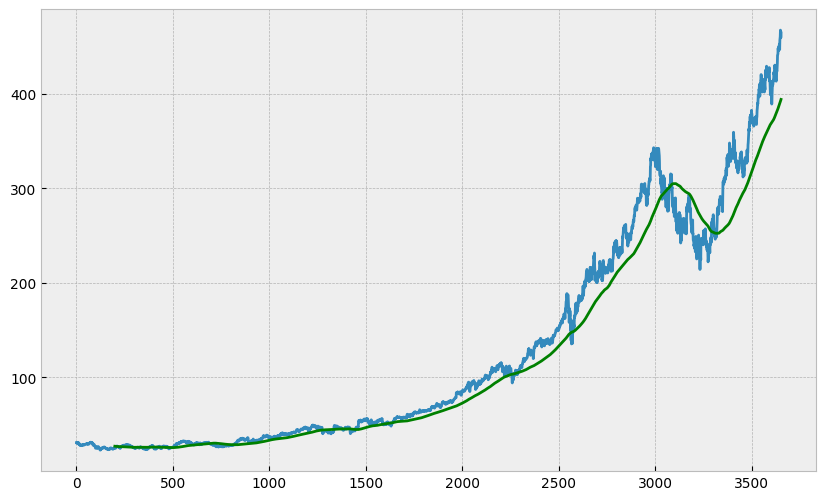

In [10]:
plt.figure(figsize=(10,6))
plt.plot(data.Close)
plt.plot(ma200, 'g')

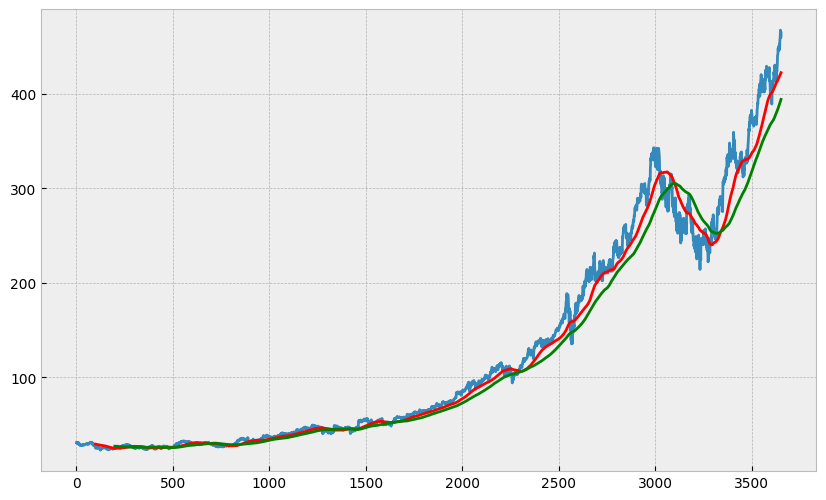

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
data.shape

(3653, 5)

In [13]:
data_train = pd.DataFrame(data = data['Close'][0:int(len(data)*0.80)])
data_test = pd.DataFrame(data = data['Close'][int(len(data)*0.80):int(len(data))])
print(data_train.shape)
print(data_test.shape)

(2922, 1)
(731, 1)


In [14]:
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.02977574],
       [0.02981324],
       [0.02910073],
       ...,
       [0.99497477],
       [0.98788716],
       [0.98979974]])

In [16]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [17]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=75, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=125, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 75)           37800     
                                                                 
 dropout_1 (Dropout)         (None, 100, 75)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 100)          70400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 125)               1

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
89/89 [==============================] - 43s 359ms/step - loss: 0.0127
Epoch 2/100
89/89 [==============================] - 30s 337ms/step - loss: 0.0037
Epoch 3/100
89/89 [==============================] - 31s 346ms/step - loss: 0.0034
Epoch 4/100
89/89 [==============================] - 31s 353ms/step - loss: 0.0030
Epoch 5/100
89/89 [==============================] - 30s 336ms/step - loss: 0.0035
Epoch 6/100
89/89 [==============================] - 30s 338ms/step - loss: 0.0029
Epoch 7/100
89/89 [==============================] - 30s 342ms/step - loss: 0.0029
Epoch 8/100
89/89 [==============================] - 31s 346ms/step - loss: 0.0025
Epoch 9/100
89/89 [==============================] - 30s 332ms/step - loss: 0.0025
Epoch 10/100
89/89 [==============================] - 30s 336ms/step - loss: 0.0027
Epoch 11/100
89/89 [==============================] - 30s 342ms/step - loss: 0.0026
Epoch 12/100
89/89 [==============================] - 30s 339ms/step - loss: 0.0023
E

In [20]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
past_100_days = data_train.tail(100)
final_data = pd.concat([past_100_days, data_test], ignore_index=True) # Use pd.concat to combine the DataFrames
final_data.head()

,Close
0,235.990005
1,237.580002
2,235.460007
3,232.339996
4,236.479996


In [22]:
input = scaler.fit_transform(final_data)
input

array([[0.08582372],
       [0.0921006 ],
       [0.08373142],
       [0.07141446],
       [0.08775807],
       [0.08286292],
       [0.06948011],
       [0.08495521],
       [0.1109313 ],
       [0.13746006],
       [0.13268328],
       [0.14073662],
       [0.15396155],
       [0.16422568],
       [0.16446253],
       [0.17464763],
       [0.16319923],
       [0.17863488],
       [0.18353003],
       [0.17563456],
       [0.17373973],
       [0.18289837],
       [0.16943671],
       [0.18514861],
       [0.18672768],
       [0.18838578],
       [0.15913307],
       [0.15104021],
       [0.14973745],
       [0.14847421],
       [0.13240691],
       [0.12719593],
       [0.14006552],
       [0.15084287],
       [0.12999879],
       [0.12624845],
       [0.09770637],
       [0.11361572],
       [0.13382809],
       [0.12210332],
       [0.11381312],
       [0.11397101],
       [0.12723539],
       [0.12206387],
       [0.14421065],
       [0.14792153],
       [0.14701356],
       [0.138

In [23]:
x_test = []
y_test = []

for i in range(100, input.shape[0]):
    x_test.append(input[i-100:i])
    y_test.append(input[i, 0])

In [24]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [25]:
y_prediction = model.predict(x_test)

23/23 [==============================] - 4s 120ms/step


In [26]:
y_test

array([0.29829063, 0.31029176, 0.3172003 , 0.31119967, 0.30192259,
       0.32576681, 0.35573008, 0.35687495, 0.34886106, 0.346453  ,
       0.33492557, 0.33741266, 0.35269037, 0.34593978, 0.34574232,
       0.34305789, 0.3430185 , 0.33922859, 0.33934701, 0.32766176,
       0.32158222, 0.32663531, 0.33768903, 0.35754612, 0.35912519,
       0.3380048 , 0.3160159 , 0.31798977, 0.33291219, 0.33678101,
       0.33595202, 0.3155028 , 0.27345936, 0.27535431, 0.26714308,
       0.29548777, 0.27184077, 0.29414555, 0.31131809, 0.31818723,
       0.31818723, 0.31573965, 0.31041019, 0.32395088, 0.34937429,
       0.35513794, 0.36729703, 0.3710079 , 0.36777073, 0.38099566,
       0.37467926, 0.37061311, 0.37842954, 0.42998703, 0.43464532,
       0.46334529, 0.4544629 , 0.46930641, 0.47274091, 0.48237339,
       0.48087323, 0.4845446 , 0.48043904, 0.46010812, 0.46654295,
       0.48347875, 0.48091275, 0.49449296, 0.49295328, 0.50144088,
       0.5087047 , 0.49575614, 0.48726854, 0.48817656, 0.45568

In [27]:
y_prediction

array([[0.291557  ],
       [0.29275313],
       [0.29382378],
       [0.2948426 ],
       [0.2958474 ],
       [0.29683053],
       [0.29787114],
       [0.29923987],
       [0.30105773],
       [0.30340815],
       [0.30633184],
       [0.30960518],
       [0.31297252],
       [0.31636497],
       [0.31966937],
       [0.32278425],
       [0.32561266],
       [0.32809514],
       [0.33017302],
       [0.33183375],
       [0.33299908],
       [0.33359945],
       [0.33368933],
       [0.3334719 ],
       [0.3333183 ],
       [0.33350593],
       [0.3339408 ],
       [0.3342688 ],
       [0.3342571 ],
       [0.33394903],
       [0.33348927],
       [0.33299726],
       [0.33238325],
       [0.33107   ],
       [0.3290251 ],
       [0.32636026],
       [0.32338822],
       [0.32031763],
       [0.31733727],
       [0.31460607],
       [0.31224227],
       [0.31032744],
       [0.30889177],
       [0.30789757],
       [0.3073576 ],
       [0.30741006],
       [0.30808273],
       [0.309

In [28]:
scaler.scale_

array([0.00394773])

In [29]:
scale_factor = 1/0.00394773
y_prediction = y_prediction * scale_factor
y_test = y_test * scale_factor

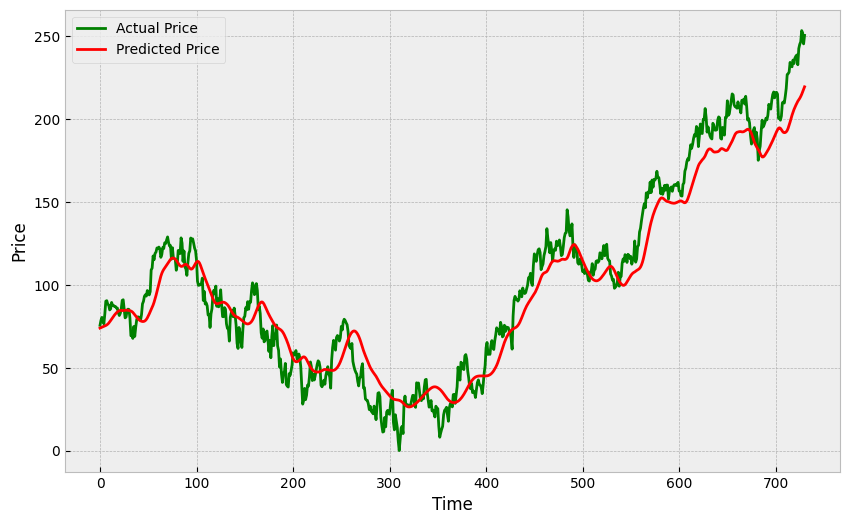

In [30]:
plt.figure(figsize=(10,6))
plt.plot(y_test, 'g', label = 'Actual Price')
plt.plot(y_prediction, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()